### 1. Jupyter notebook

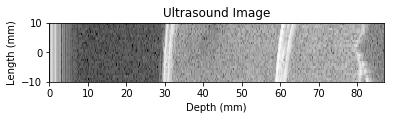

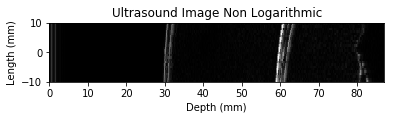

In [6]:
#we use a simple open command for the file (basic Python)
f = open('MultipleUSSignalsI.dat','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Lines = np.fromfile(f,count=-1,dtype=np.uint16)
f.close() #close the file
#we will now populate a 2D matrix for the lines
TL=len(Lines)/L
Lines=Lines-np.mean(Lines)
LinesRF=Lines.reshape(TL,L,order='F').copy()  #columns,rows
#Compensating
h=x*1450
ffatt=np.exp(2*4.96*h)
LinesRFC=LinesRF*ffatt
LinesRFE=hilbert(LinesRFC)
LinesRFE=abs(LinesRFE)

#images need to be logarithmic so we can see all the contrast
Mx=LinesRFE.max()
Image=20*np.log10(LinesRFE/Mx)
ImageBW=LinesRFE

#the line axis
s=np.linspace(-10,10,26)
#Plotting
d=h/2*1000  #answer: why are we doing this here?
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, Image[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)  #this is because I know the image was 20mm in lenght so 26 lines=20mm or a ratio 10/13
plt.title('Ultrasound Image')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageBW[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image Non Logarithmic')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

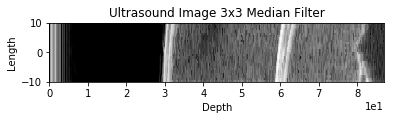

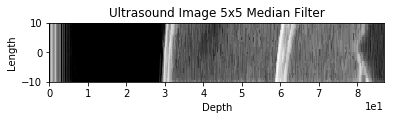

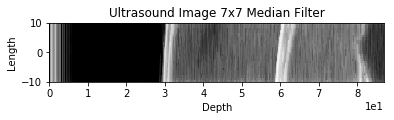

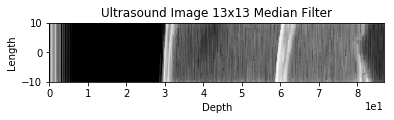

In [15]:
#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 3x3 median filter
ImageF=medfilt(Image,3)

#Plotting
d=h/2*1000
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 3x3 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 5x5 median filter
ImageF=medfilt(Image,5)

#Plotting
d=h/2*1000
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 5x5 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 7x7 median filter
ImageF=medfilt(Image,7)

#Plotting
d=h/2*1000
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 7x7 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 13x13 median filter
ImageF=medfilt(Image,7)

#Plotting
d=h/2*1000
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 13x13 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

I used different kind of filter for rendering the Ultrasound image. As we increase the size of filter, it give us the large different effect on our ultrasound image. As you see filter 3x3 has more noise than the filter 13x13.AS you  increase the size of filter it make picture look bluring both noise componets and useful information.

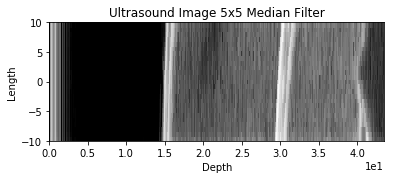

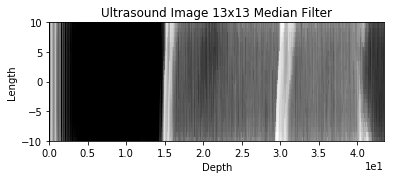

In [17]:
#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 3x3 median filter
ImageF=medfilt(Image,5)

#Plotting
d=h/2*500
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 5x5 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 5x5 median filter
ImageF=medfilt(Image,13)

#Plotting
d=h/2*500
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(10./13)
plt.title('Ultrasound Image 13x13 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

I changed the picture size and than compare the 5x5 and 13x13 median filter.you can see 5x5 filter has more noise as compare to the 13x13. As you increase the size of your picture it make picture look bluring of both noise and userful information.To overcome this disadvantage we can use adaptive features technique can be used here.But this technique is much more complocated than the median filter.That's why we used median filter in ultrasound machine.

# 3. Ultrasound  Imaging

### 1.

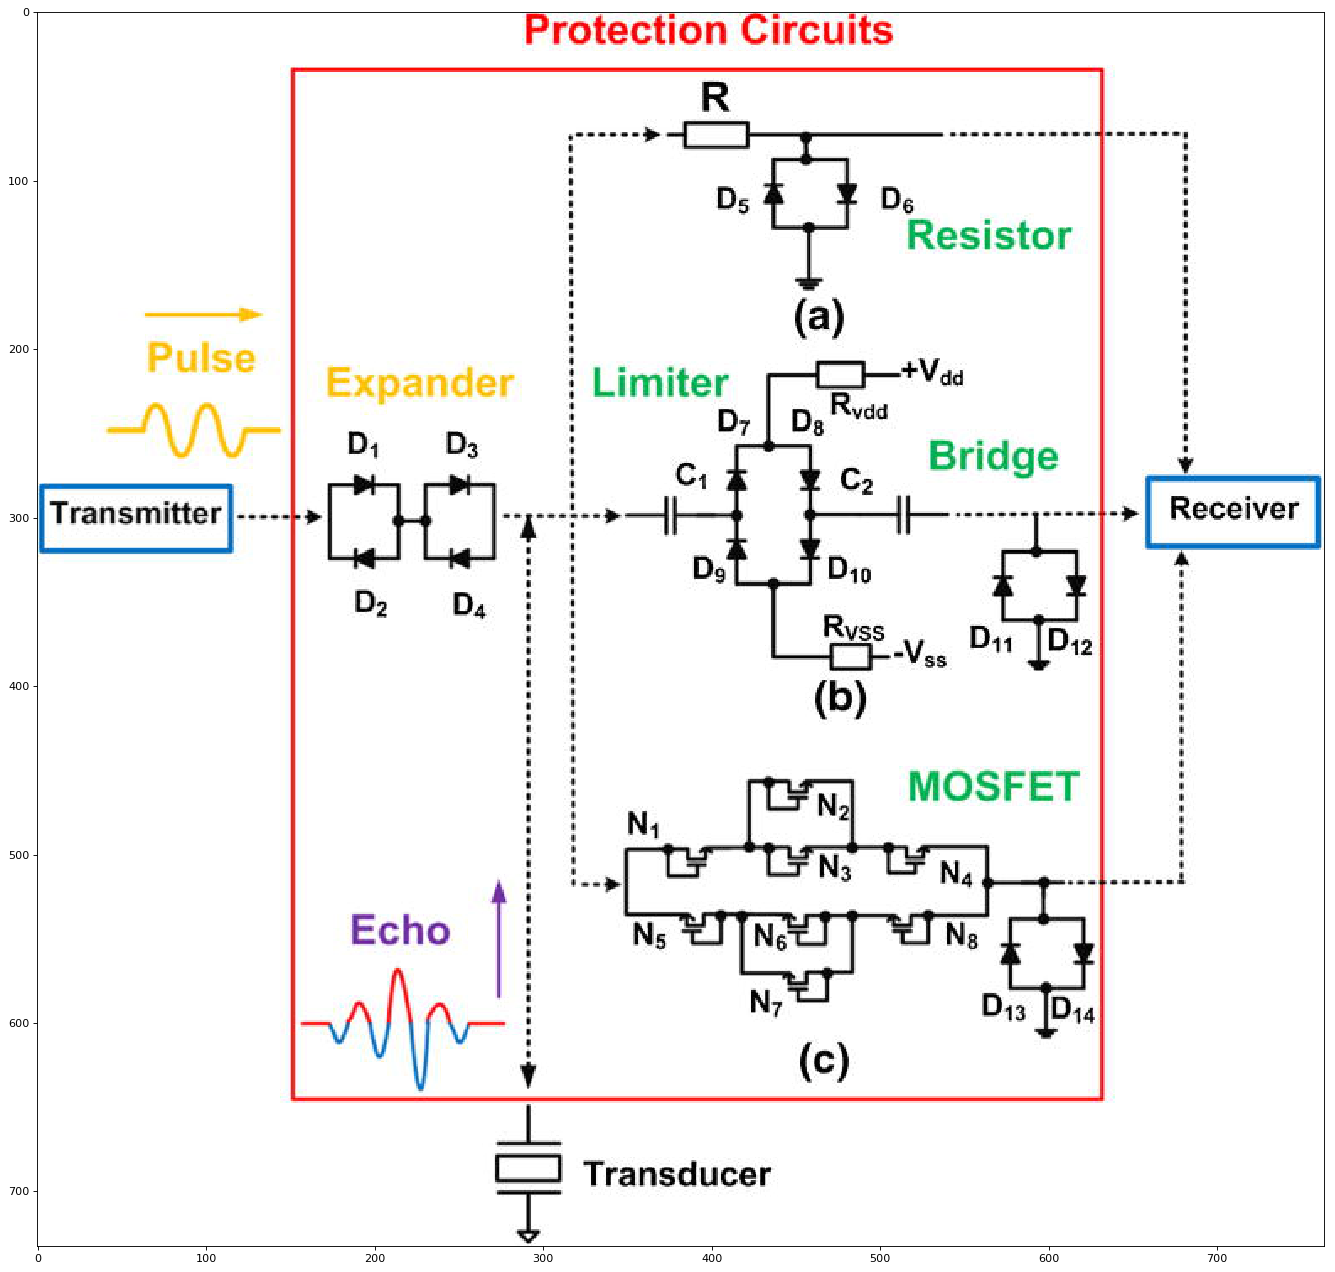

In [37]:
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
pic = novice.open('ultrasoundprotector.jpg') # Picture from reference [1]
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
pic.show()

$[1]$The purpose of protection circuits in ultrasound applications is to block noise signals from the transmitter from reaching the transducer and also to prevent unwanted high voltage signals from reaching the receiver. 
As shown in Fig., the protection circuits for an ultrasound system are composed of the expander and limiter. The expander prevents the noise signals originating from the transmitter from reaching the transducer and the limiter prevents high voltage pulse signals produced by the transmitter from reaching the receiver.As because of the limited bandwidth this circuit is very helpful to protect our unltrasound system because output volage is controlled.  Normally, the expander consists of a single, crossed diode pair $[2]$. However, since transducers require abnormally high voltage excitation pulses, two crossed diode pairs (D1–D4) are needed to block the noise signals more sufficiently as shown in Fig.
The high impedence value in transducer terminal and low impedence value usally selected in low noise signal amplifier circuits.$[1]$In the ultrasound protection circuit, the expander circuit normally passes high voltage pulse signals and blocks low voltage noise signals traveling from the transmitter to the transducer. Conversely, the limiter circuit passes low voltage echo signals from the transducers and blocks high voltage pulse signals.

It can be used before the digitizing the image. Because here our signal is in analog, as you can see in our figure circuit input is in analog form as well as pluse also.
$[3]$It right to connect limiter circuit beofre the amplification.Limiter Circuit is utilized as a brick wall that avoids signal peaks causing damage to ultrasound recorder or overloading amplifiers (or recording devices), so limiters should only activate occasionally. And most sensors and transducer are analog device, their output require certain amount of analog signal before they are converted into analog signal.

#### 2.

No, During the ulrasound we used get to get rid of the nosie and fill the space between the probe and human skin( so there is no space for passing the air from there.After of the we can use median filter to remove if wa have any.Our signal we used fast fourier transform as hilbert tranform. So,receiver we get the all signal and show the ultrasound image of the body part.

# Impedence matching

# 2

[4][5]So we have our impdence 539+j274 and than we used this method to calculate the solution R+jWL.
In this example a resistor of  539 Ω and a coil with a impedance of  274 Ω are series connected.
These two components in serie make one complex impedance.
Part-1. The notation of a complex impedance can be Z=R+JX.
In this case a resistor and coil are series connected.
The impedance of the coil is: X=2.pi.f.L

Part-2. The notation for complex impedance can also be: Z=R-JX.
In this case a resistor and capacitor are series connected.
The impedance of the capacitor is X= 1/(2.pi.f.C)

** we calculate our frequecy in agular rad/sec 

Part 1-- Z=R+JX :- X=2.pi.f.L    L=274   # so, we compare our impdence with this formula .

=> 2.pi.f (f=1 MHZ)= 39.458 Rad/sec 

=> R+JX(X=2.pi.f.L)= 539+j274 

=> 39.458*L=274 

=> L= 274/39.458

=> L=6.944 and R=539

Part 2-- Z=R-JX :- X= 1/(2.pi.f.C)  # as according to our formula our JX value is postive to apply the complex impdence of capactior we need to convert it into negative value. 539-j/274

=> 2.pi.f (f=1 MHZ)= 39.458 Rad/sec 

=> R-JX(X= 1/(2.pi.f.C)=539-j/274

=> 1/39.458*C = 1/274

=> C= 0.143 and R=539



# Reference:-

[1]. Choi H, Shung KK. Protection Circuits for Very High Frequency Ultrasound Systems. Journal of medical systems. 2014;38(4):34.

[2].Fuller MI, Blalock TN, Hossack JA, Walker WF. Novel transmit protection scheme for ultrasound systems. IEEE Trans Ultrason Ferroelectr Freq Control. 2007;54(1):79–86

[3] http://www.doctorproaudio.com/doctor/temas/dynamics-processors-compressors_en.shtml

[4] http://www.electro-tech-online.com/threads/impedance-of-rlc-circuit-from-phasor.135639/

[5] http://www.waves.utoronto.ca/prof/svhum/ece357/problems/probset3soln.pdf